In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [5]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


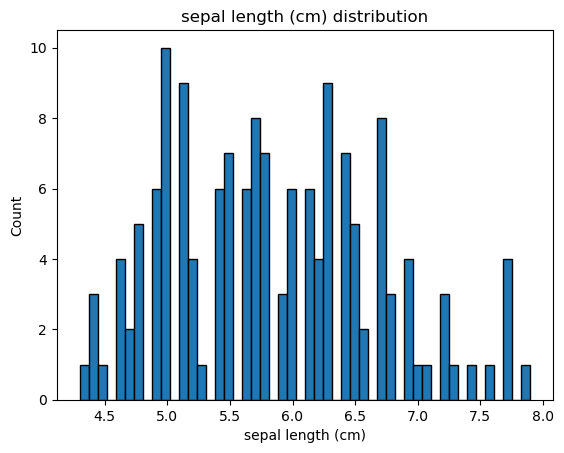

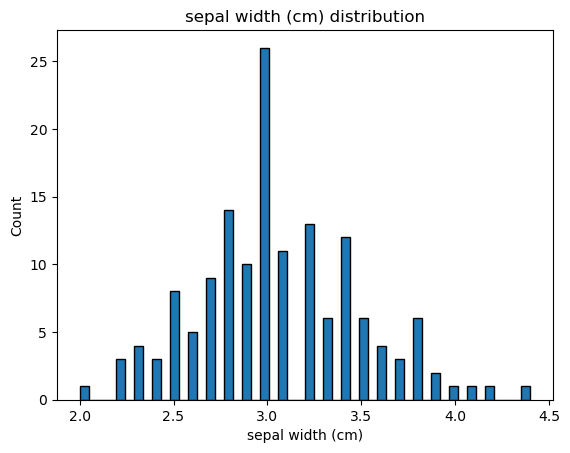

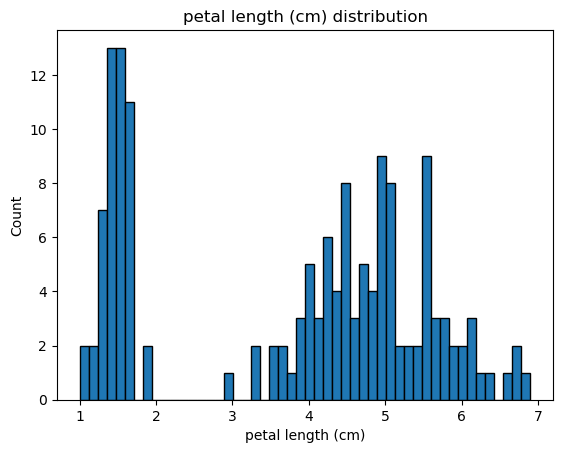

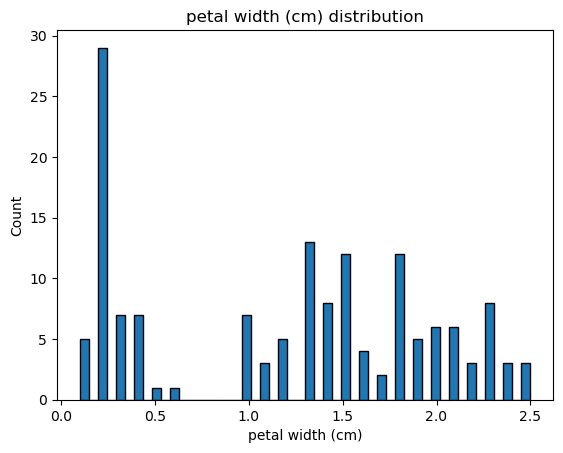

In [7]:
columns_iris = ['sepal length (cm)','sepal width (cm)',	'petal length (cm)','petal width (cm)']
for col in columns_iris:
    df[col].plot.hist(bins=50, edgecolor='black')
    plt.title(f'{col} distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

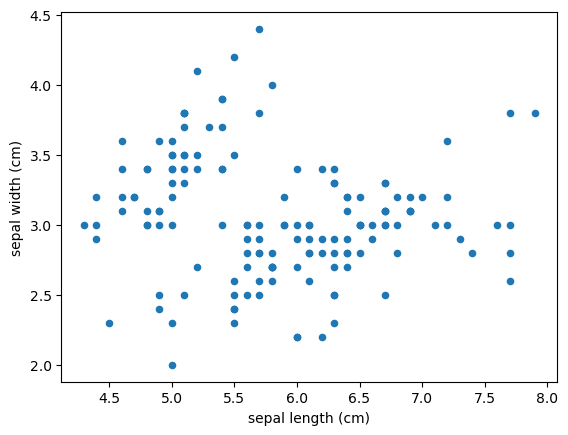

In [8]:
df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')

In [9]:
df['target'] = iris.target

In [10]:
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

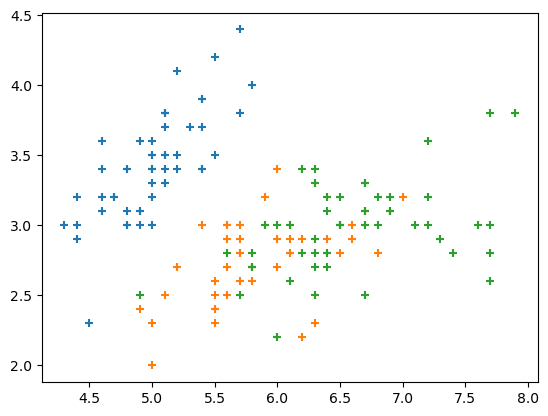

In [11]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker="+")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], marker="+")

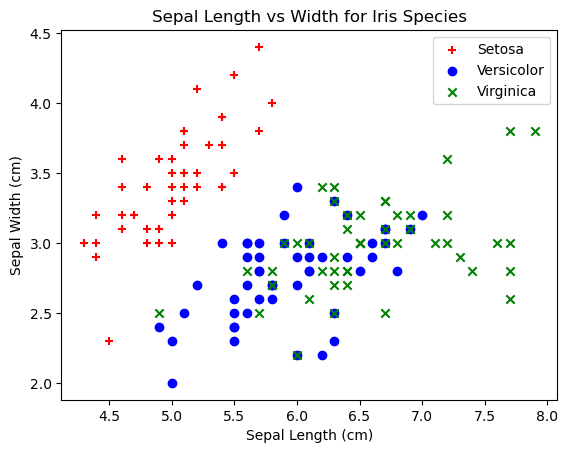

In [12]:
# Assuming df has 'sepal length (cm)', 'sepal width (cm)', and 'target' columns
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], marker='+', label='Setosa', color='red')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker='o', label='Versicolor', color='blue')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], marker='x', label='Virginica', color='green')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Width for Iris Species")
plt.legend()
plt.show()


In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
input = df.drop('target', axis=1)
label = df['target']
input, label

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(input, label, train_size=0.9, random_state=42)
X_train.shape

(135, 4)

In [16]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [17]:
model.score(X_test, y_test)

1.0

In [18]:
model.score(X_train, y_train)

0.9703703703703703

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred = model.predict(X_train)

In [21]:
accuracy_score(y_train, y_pred)

0.9703703703703703

In [22]:
y_predict = model.predict(X_train)

In [23]:
cm = confusion_matrix(y_train, y_predict)
cm

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  1, 46]], dtype=int64)

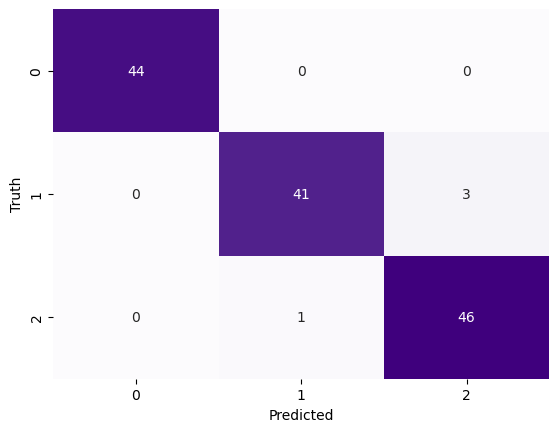

In [24]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()